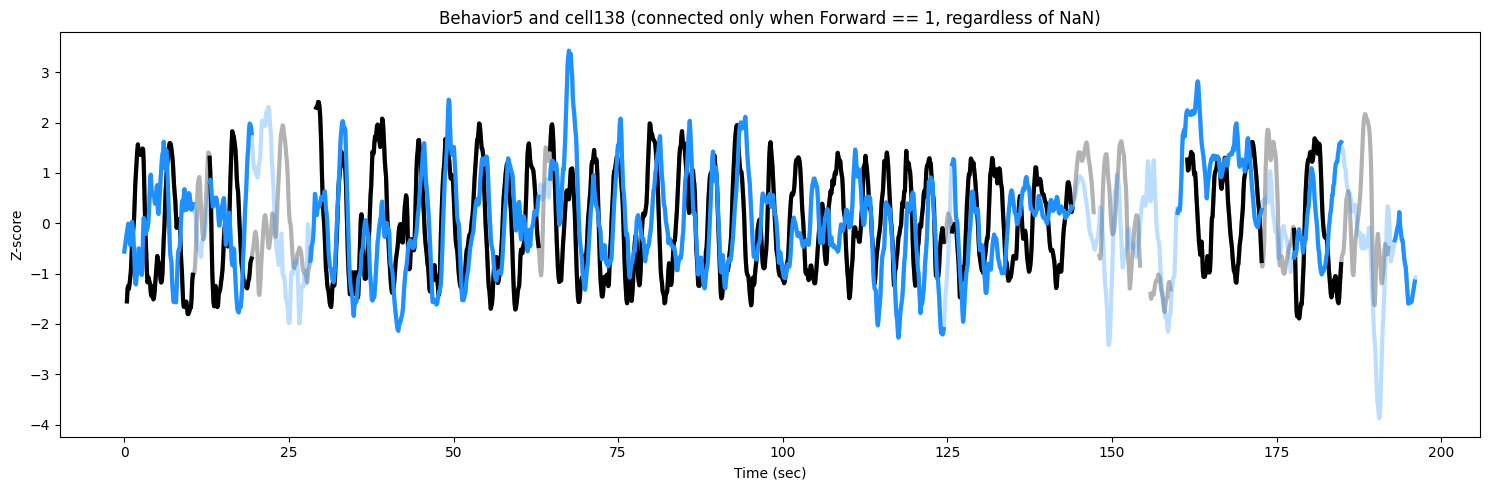

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === データ読み込み ===
df = pd.read_excel("cell138_behav5.xlsx")  # ファイルパスを適宜修正
time_sec = df["Delta"]
behavior5 = df["Behavior5"]
cell138 = df["cell138"]
forward = df["Forward"]
cell_name= cell138

# === zスコア正規化（NaNを含んだままでOK） ===
behavior5_z = (behavior5 - behavior5.mean()) / behavior5.std()
cell138_z = (cell138 - cell138.mean()) / cell138.std()

# === Forward==1 のみを条件にしたマスク ===
forward_mask = (forward == 1)

# === プロット準備 ===
fig, ax = plt.subplots(figsize=(15, 5))

# --- 全体を半透明で描画 ---
ax.plot(time_sec, behavior5_z, color="black", alpha=0.3, label="Behavior5 (all)", linewidth=3)
ax.plot(time_sec, cell138_z, color="dodgerblue", alpha=0.3, label="cell138 (all)", linewidth=3)

# --- Forward==1 の連続区間を再描画 ---
in_segment = False
for i in range(len(forward_mask)):
    if forward_mask.iloc[i]:
        if not in_segment:
            segment_start = i
            in_segment = True
    else:
        if in_segment:
            segment_end = i
            ax.plot(time_sec[segment_start:segment_end], behavior5_z[segment_start:segment_end],
                    color="black", linewidth=3)
            ax.plot(time_sec[segment_start:segment_end], cell138_z[segment_start:segment_end],
                    color="dodgerblue", linewidth=3)
            in_segment = False

# --- 最後の区間が終端まで続いていた場合の処理 ---
if in_segment:
    ax.plot(time_sec[segment_start:], behavior5_z[segment_start:], color="black", linewidth=3)
    ax.plot(time_sec[segment_start:], cell138_z[segment_start:], color="dodgerblue", alpha=0.6, linewidth=3)

# === 軸ラベル・タイトルなど ===
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Z-score")
ax.set_title("Behavior5 and cell138 (connected only when Forward == 1, regardless of NaN)")

fig.tight_layout()
fig.savefig(f"behav5_{cell_name}_forward1.png", dpi=300)
plt.show()


/var/folders/jp/_t5jnvzs2_1_k9zqwdy099500000gn/T/ipykernel_50089/1171970148.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


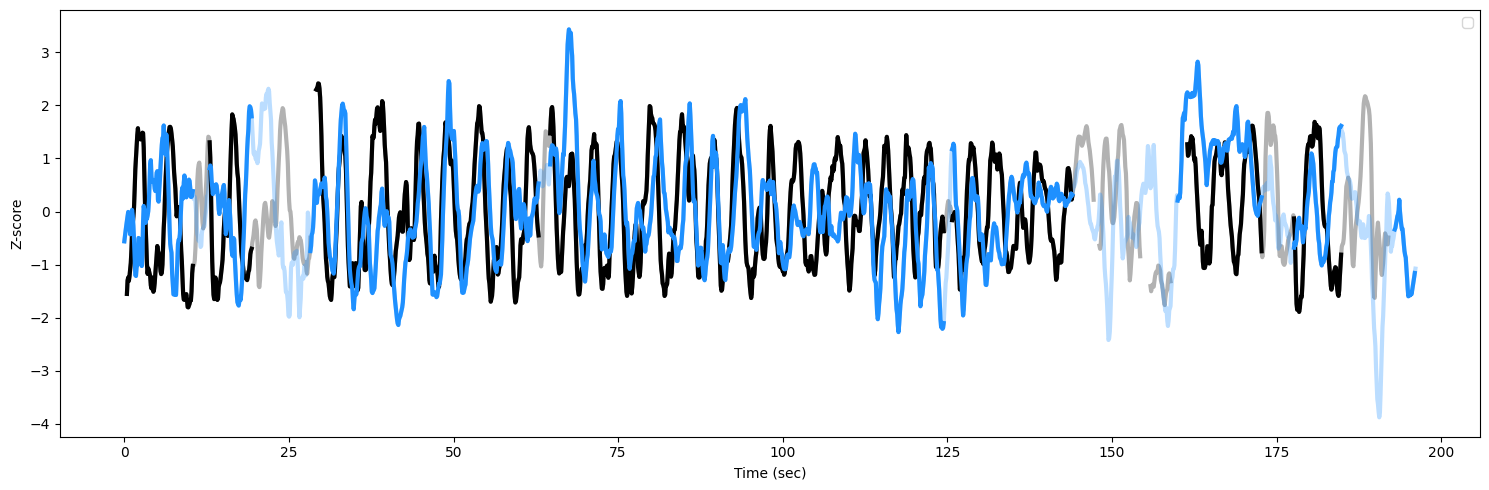

In [3]:
#ベクターフォーマット
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ベクター出力時のフォント埋め込み設定（Type 3回避）
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# === データ読み込み ===
df = pd.read_excel("cell138_behav5.xlsx")  # ファイルパスを適宜修正
time_sec = df["Delta"]
behavior5 = df["Behavior5"]
cell138 = df["cell138"]
forward = df["Forward"]
cell_name_str = "cell138"  # ファイル名用の固定名（必要なら変える）

# === zスコア正規化（NaNを含んだままでOK） ===
behavior5_z = (behavior5 - behavior5.mean()) / behavior5.std()
cell138_z = (cell138 - cell138.mean()) / cell138.std()

# === Forward==1 のみを条件にしたマスク ===
forward_mask = (forward == 1)

# === プロット準備 ===
fig, ax = plt.subplots(figsize=(15, 5))

# --- 全体を半透明で描画（※PDFでは透明度部分がラスタ化される可能性あり） ---
ax.plot(time_sec, behavior5_z, color="black", alpha=0.3,  linewidth=3)
ax.plot(time_sec, cell138_z, color="dodgerblue", alpha=0.3,  linewidth=3)

# --- Forward==1 の連続区間を再描画 ---
in_segment = False
for i in range(len(forward_mask)):
    if forward_mask.iloc[i]:
        if not in_segment:
            segment_start = i
            in_segment = True
    else:
        if in_segment:
            segment_end = i
            ax.plot(time_sec[segment_start:segment_end], behavior5_z[segment_start:segment_end],
                    color="black", linewidth=3)
            ax.plot(time_sec[segment_start:segment_end], cell138_z[segment_start:segment_end],
                    color="dodgerblue", linewidth=3)
            in_segment = False

# --- 最後の区間が終端まで続いていた場合の処理 ---
if in_segment:
    ax.plot(time_sec[segment_start:], behavior5_z[segment_start:], color="black", linewidth=3)
    ax.plot(time_sec[segment_start:], cell138_z[segment_start:], color="dodgerblue", linewidth=3)

# === 軸ラベル・タイトルなど ===
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Z-score")
#ax.set_title("Behavior5 and cell138 (connected only when Forward == 1, regardless of NaN)")
ax.legend()
fig.tight_layout()

# === ベクターフォーマットで保存 ===
base = f"behav5_{cell_name_str}_forward1"
fig.savefig(f"{base}.svg")   # 透明度ありでもベクター維持しやすい
fig.savefig(f"{base}.pdf")   # 透明度部分は環境によってラスタ化されることあり

plt.show()
